# Heart Disease UCI - Data Exploration

Data downloaded from Kaggle - https://www.kaggle.com/ronitf/heart-disease-uci.

A brief description of the dataset, from that page:

"This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date."

<p>
<i>The following information is taken from a comment made by InitPic on kaggle:
    <a href="https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877">InitPic's comment</a>
    </i>
<p>
<strong>Column names and meanings:</strong>

<p>Chest pain type
<ul>
    <li>Value 0: asymptomatic</li>
    <li>Value 1: atypical angina</li>
    <li>Value 2: non-anginal pain</li>
    <li>Value 3: typical angina</li>
</ul>

<p>
restecg: resting electrocardiographic results
<ul>
    <li>Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria</li>
    <li>Value 1: normal</li>
    <li>Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>
</ul>

slope: the slope of the peak exercise ST segment
<ul>
    <li>0: downsloping</li> 
    <li>1: flat</li>
    <li>2: upsloping</li>
</ul>

thal: 
<ul>
    <li>1 = fixed defect</li> 
    <li>2 = normal</li> 
    <li>7 = reversable defect</li>
</ul>

target (maybe THE most important feature): 
<ul>
    <li>0 = disease</li>
    <li>1 = no disease</li>
</ul>

More information about the "thal" column (thal stands for Thalium, a radioactive tracer injected during a stress test):<br>
<i>Nuclear stress testing requires the injection of a tracer, commonly technicium 99M (Myoview or Cardiolyte), which is then taken up by healthy, viable myocardial cells. A camera (detector) is used afterwards to image the heart and compare segments. A coronary stenosis is detected when a myocardial segment takes up the nuclear tracer at rest, but not during cardiac stress. This is called a "reversible defect." Scarred myocardium from prior infarct will not take up tracer at all and is referred to as a "fixed defect."</i>

A few more things to consider:
data #93, 139, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.


In [7]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read in the data and take a look
df = pd.read_csv('heart.csv')

In [4]:
df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


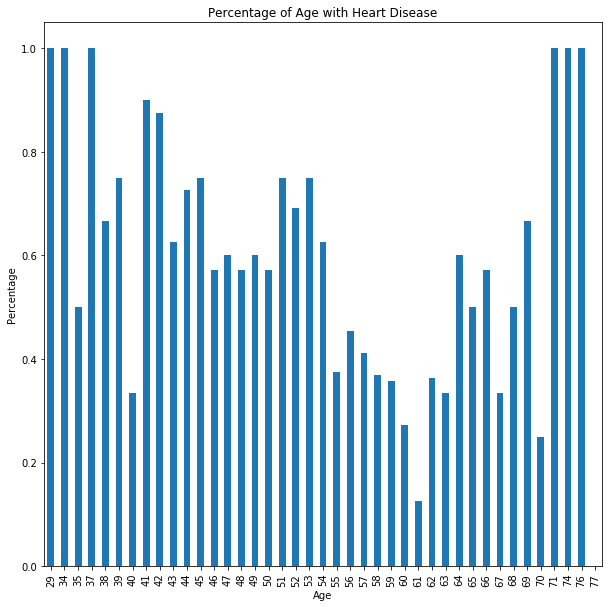

In [18]:
# what's the incidence of heart disease by age? Take the mean of a binary column will give you the percentage
# of 1's in that column

df.groupby('age') \
    .target \
    .mean() \
    .plot(kind='bar', figsize=(10,10))

plt.ylabel('Percentage')
plt.xlabel('Age')
_ = plt.title('Percentage of Age with Heart Disease')

In [17]:
# doesn't seem to show too much (or make much sense). Maybe the buckets are too small.
# check the size of our age groups
df.groupby('age').size()

age
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
dtype: int64

The individual ages don't have enough respondents in each bucket to make meaningful visualizations.
We'll cut the ages into bins.

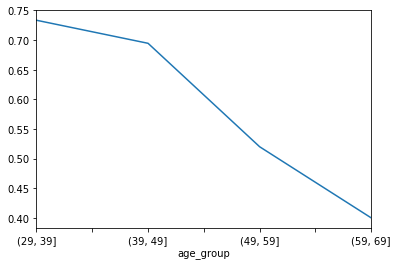

In [40]:
bins = np.arange(df.age.min(), df.age.max(), 10)
df['age_group'] = pd.cut(df.age, bins=bins)
df.groupby('age_group'). \
    target. \
    mean(). \
    plot()

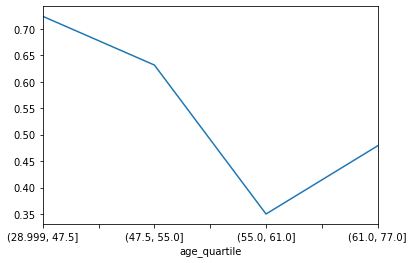

In [37]:
df['age_quartile'] = pd.qcut(df.age, q=4)
df.groupby('age_quartile'). \
    target. \
    mean(). \
    plot()

In [39]:
df.groupby('age_quartile').target.mean()

age_quartile
(28.999, 47.5]    0.723684
(47.5, 55.0]      0.631579
(55.0, 61.0]      0.350000
(61.0, 77.0]      0.478873
Name: target, dtype: float64

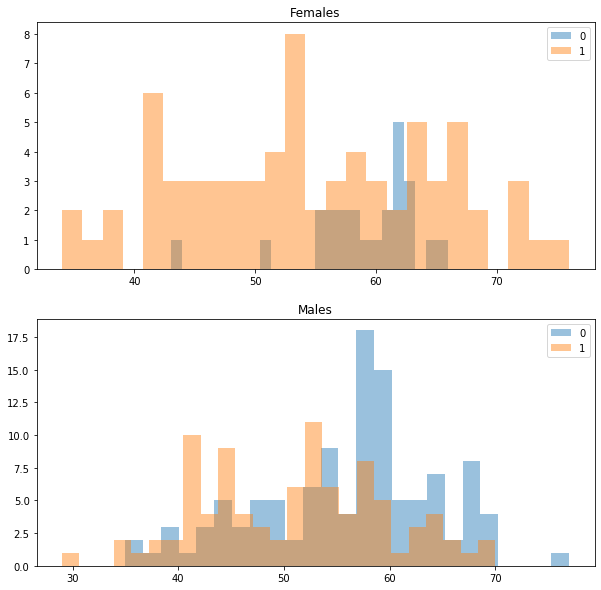

In [28]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

ax = ax.flatten()

for grp in df.groupby(['sex', 'target']):
    plotdf = grp[1]
    sex = grp[0][0]
    target = grp[0][1]
    
    ax[sex].hist(plotdf.age.values, alpha=0.45, label=target, bins=25)

ax[0].set_title('Females')
ax[1].set_title('Males')
for a in ax:
    a.legend()




In [42]:
import plotly.graph_objects as go

In [51]:
z = df.corr().values
z[z==1] = np.nan
x = list(df.corr().columns)
y = list(df.corr().columns)
fig = go.Figure(data=go.Heatmap(z=z, x=x, y=y))
fig.show()


In [52]:
def plotly_corr_heatmap(df):
    """
    Create a plotly heatmap
    """
    
    dff = df.corr()
    cols = list(dff.columns)
    z = dff.values
    z[z==1.0] = np.nan
    z = z.tolist()
    
    fig = go.Figure(go.Heatmap(z=z, x=cols, y=cols))
    
    return fig

In [53]:
fig2 = plotly_corr_heatmap(df)


In [54]:
fig2.show()

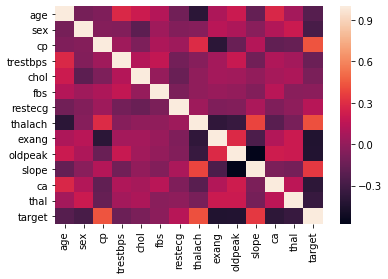

In [55]:
import seaborn as sns
sns.heatmap(df.corr())